# 時間序列 Arima 模型

此模型引用網路的[教學資料](https://sites.google.com/site/econometricsacademy/econometrics-models/time-series-arima-models)，分析產品價格指數(product price index, ppi)並預測後續可能走勢。是一個非季節相關的Arima model (non-seasonal Arima model)

In [2]:
%matplotlib inline

In [3]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


 ## 讀取原始資料
 
取出ppi 與 年份，對此原始資料作圖

In [4]:
dta = pd.read_csv('timeseries_ppi.csv')

In [5]:
dta.head(5)

,yearqrt,m3,ppi,cpi,gdp,m1nsa,ddnsa,t,lnppi,dppi,dlnppi,lppi,trend
0,1960q1,692.00000,25.400000,19.280001,2391.0000,140.53000,111.67,1960q2,3.234749,NaN,NaN,NaN,1
1,1960q2,701.59998,25.440001,19.400000,2379.2000,138.42999,109.47,1960q3,3.236323,0.040001,0.001574,25.400000,2
2,1960q3,709.50000,25.370001,19.450001,2383.6001,139.60001,110.33,1960q4,3.233567,-0.070000,-0.002755,25.440001,3
3,1960q4,722.09998,25.400000,19.559999,2352.8999,142.67999,113.23,1961q1,3.234749,0.029999,0.001182,25.370001,4
4,1961q1,726.20001,25.490000,19.570000,2366.5000,142.22000,113.40,1961q2,3.238286,0.090000,0.003537,25.400000,5


In [6]:
ydata = dta['ppi']
dates = sm.tsa.datetools.dates_from_range('1960q1','2002q1')
ydata.index = dates

In [7]:
type(ydata.index[0])

pandas.tslib.Timestamp

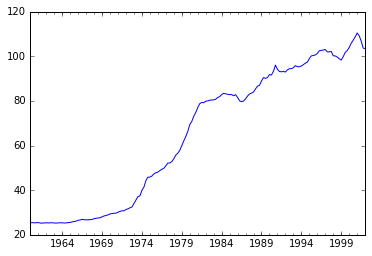

In [8]:
ydata.plot()

### 自相關函數(ACF) 與偏相關函數(PCF)

Arima 模型中必須確定：

1. 決定原函數是否為平穩函數？
2. 若否應選擇第幾階差分(difference)能得到？

### 原函數

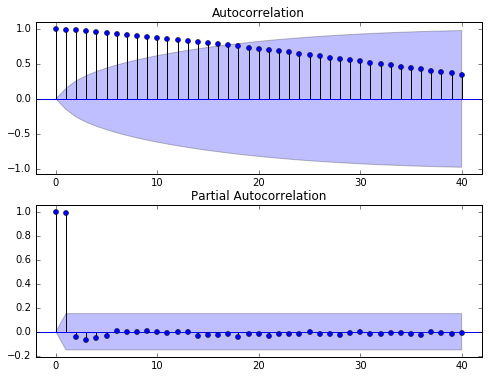

In [9]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(ydata,lags=40,ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(ydata,lags=40,ax=ax2)

## Dickey-Fuller test
檢查資料`y(t)`是否為平穩狀態

In [10]:
sm.tsa.stattools.adfuller(ydata)[:2]

(-0.77456177567695983, 0.82648040144240387)

### 一階差分

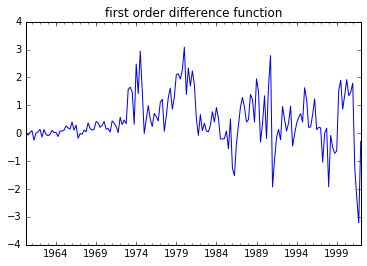

In [11]:
y_diff1 = ydata.diff(1)[1:]
y_diff1.plot()
plt.title('first order difference function')

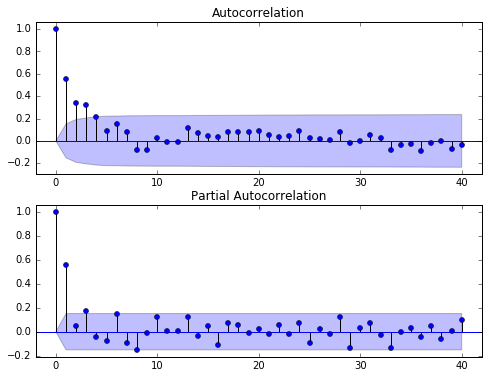

In [12]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(y_diff1,lags=40,ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_diff1,lags=40,ax=ax2)

## Dickey-Fuller test
檢查資料`y'(t)`與`y''(t)`是否為平穩狀態 -->觀察P value是否小於0.05

In [13]:
print sm.tsa.stattools.adfuller(y_diff1)[:2];
y_diff2 = y_diff1.diff(1)[1:]
print sm.tsa.stattools.adfuller(y_diff2)[:2]

(-4.0477426790655979, 0.0011801482847234568)
(-6.0671303301315698, 1.1744622125962198e-07)


## 使用Arima model

### 比較ydata在
* arima(p=1,d=0,q=0) --> Ar(1)模型
  * ar.L1.ppi 約1 -->表示為非穩態 $y_t = y_{t-1} + e_t + c$
* arima(p=1,d=1,q=0) --> 對於y'(t)的Ar(1)模型
  * ar.Li.ppi <1 --> 穩態
  * AIC=392(arima(1,1,0) > AIC=502(arima(1,0,0))

In [16]:
from statsmodels.tsa.arima_model import ARIMA
arima100 = ARIMA(ydata,(1,0,0),freq='Q').fit()
arima110= ARIMA(ydata,[1,1,0],freq='Q').fit()
print arima100.summary()
print "\n"
print arima110.summary()

                              ARMA Model Results                              
Dep. Variable:                    ppi   No. Observations:                  169
Model:                     ARMA(1, 0)   Log Likelihood                -248.202
Method:                       css-mle   S.D. of innovations              1.029
Date:                Mon, 25 Jan 2016   AIC                            502.404
Time:                        11:45:18   BIC                            511.794
Sample:                    03-31-1960   HQIC                           506.215
                         - 03-31-2002                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         64.4080     37.989      1.695      0.092       -10.049   138.865
ar.L1.ppi      0.9996      0.000   2015.140      0.000         0.999     1.001
                                    Roots           

/home/ihong/anaconda2/lib/python2.7/site-packages/statsmodels-0.6.1-py2.7-linux-x86_64.egg/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


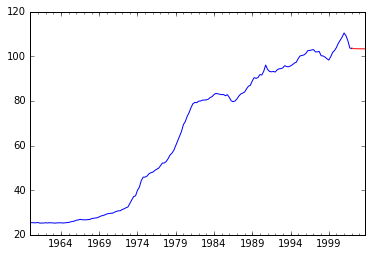

In [17]:
predict_100 = arima100.predict('2002q1','2003q4')
ydata.plot()
predict_100.plot(color='red')

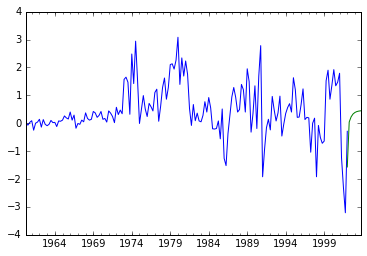

In [18]:
# dates[-5:]
predict_diff1 = arima110.predict('2002q1','2003q4') # predict 1st difference result
# ydata.plot()

y_diff1.plot()
predict_diff1.plot(color = 'green')

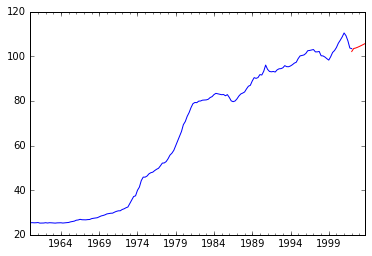

In [19]:
predict_ppi = arima110.predict('2002q1','2003q4',typ='levels')
ydata.plot()
predict_ppi.plot(color='red')

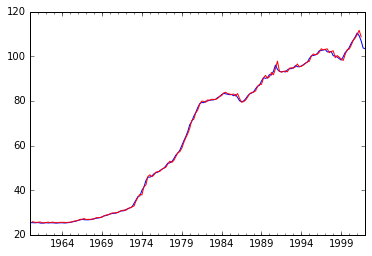

In [37]:
predict_ppi = arima110.predict('1960q2','2001q3',typ='levels')
ydata.plot()
predict_ppi.plot(color='red')

## Plot for the residual
* 可透過QQplot來判斷預估的值是否滿足高斯分佈
* 透過殘差的ACF, PCF判斷是否已經是白噪音

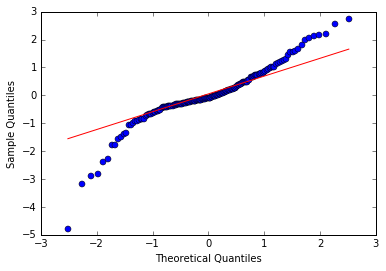

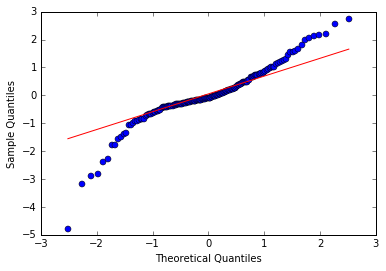

In [39]:
from statsmodels.graphics.api import qqplot
resid = arima110.resid
qqplot(resid,line='q',fit=True)

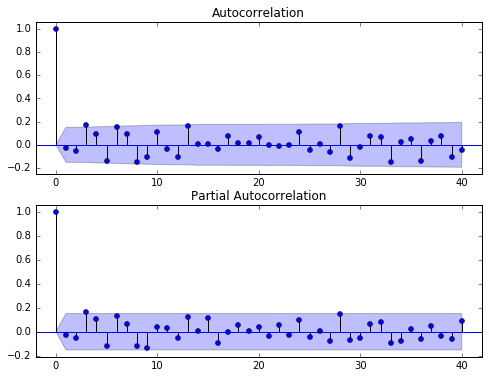

In [40]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(resid,lags=40,ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid,lags=40,ax=ax2)

# Test from datasets

In [20]:
from statsmodels.datasets.macrodata import load_pandas

In [21]:
cpi = load_pandas().data['cpi']
dates = sm.tsa.datetools.dates_from_range('1959q1','2009q3')
cpi.index = dates
cpi.head(5)

1959-03-31    28.98
1959-06-30    29.15
1959-09-30    29.35
1959-12-31    29.37
1960-03-31    29.54
Name: cpi, dtype: float64

In [39]:
cpi.reindex = dates
type(cpi.index[0])

pandas.tslib.Timestamp

In [26]:
res = ARIMA(cpi,(1,1,1),freq='Q').fit()
print res.summary()

                             ARIMA Model Results                              
Dep. Variable:                  D.cpi   No. Observations:                  202
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -241.756
Method:                       css-mle   S.D. of innovations              0.800
Date:                Sat, 23 Jan 2016   AIC                            491.511
Time:                        23:07:11   BIC                            504.744
Sample:                    06-30-1959   HQIC                           496.865
                         - 09-30-2009                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           0.8809      0.206      4.280      0.000         0.477     1.284
ar.L1.D.cpi     0.9399      0.046     20.566      0.000         0.850     1.029
ma.L1.D.cpi    -0.7710      0.090     -8.590    